In [1]:
#import the dataset csv file
import pandas as pd
import numpy as up
!pip install sklearn

df = pd.read_csv('fraudTrain.csv')


  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /root/.cache/pip/wheels/04/0d/bd/ece5f15a5aea68fcb85632ecd7ad7f5ecf78d28152e8e1003e
Successfully built sklearn
You are using pip version 9.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,8/3/2020 6:18,2.290000e+15,fraud_Brown-Greenholt,entertainment,44.73,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,8ef9ff08f404d7b3d3e409d01c6864f4,1362723493,33.116261,-81.127674,0
1,8/3/2020 6:18,4.070000e+12,"fraud_Jones, Sawayn and Romaguera",misc_net,5.76,Jamie,Olson,F,3423 Michael Canyon Suite 276,River,...,37.8795,-82.7251,571,Quarry manager,7/3/1931,7a8c62f34d624a99e041233b78679fea,1362723496,37.123037,-83.502413,0
2,8/3/2020 6:18,3.770000e+14,fraud_Sawayn PLC,shopping_pos,96.66,Kara,Miles,F,2076 Thomas Roads Suite 970,Cassatt,...,34.3424,-80.5000,4424,Lawyer,31/07/1961,14dcda986afe1957c339197b144a323c,1362723515,33.502133,-80.324071,0
3,8/3/2020 6:20,6.042293e+10,fraud_Kuphal-Bartoletti,misc_net,4.48,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,North Augusta,...,33.6028,-81.9748,46944,Secondary school teacher,2/4/1942,398936847b2beb1d4719e56da6f106cc,1362723632,33.920335,-82.428727,0
4,8/3/2020 6:20,3.530000e+15,fraud_Huels-Hahn,gas_transport,54.87,Melissa,Rodriguez,F,81708 Christopher Plaza,Jordanville,...,42.8948,-74.8209,824,Travel agency manager,1/9/1985,4d21d720de023bcef6f822fbeceaf22d,1362723647,43.772547,-74.400886,0
5,8/3/2020 6:21,3.520000e+15,"fraud_Goldner, Kovacek and Abbott",grocery_pos,98.87,Wayne,Marsh,M,172 Leonard Island,Dumont,...,39.7532,-105.6356,565,Mental health nurse,27/08/1978,b54c360017f99b4d2352f4a81cab0d45,1362723671,40.258221,-105.141406,0
6,8/3/2020 6:21,3.030000e+13,fraud_Vandervort-Funk,grocery_pos,103.25,Lisa,Lin,F,908 Brooks Brook,Lomax,...,40.6761,-91.0391,725,Environmental consultant,28/11/1972,c180787d4285023b09aaa242daa91c12,1362723680,41.218735,-91.518163,0
7,8/3/2020 6:21,4.310000e+15,"fraud_Osinski, Ledner and Leuschke",grocery_pos,109.56,William,Marshall,M,454 Sawyer Forks Apt. 231,Collegeville,...,45.5783,-94.4199,1536,Farm manager,18/02/1981,36b1a0cfac094e5fb11590dee60ae340,1362723694,44.674574,-95.191644,0
8,8/3/2020 6:22,6.010000e+15,"fraud_Schultz, Simonis and Little",grocery_pos,129.62,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,Rocky Mount,...,38.2911,-92.7059,1847,Tax inspector,26/10/1988,7068d176133365666e39c6660d3953b3,1362723766,38.533977,-91.941830,0
9,8/3/2020 6:23,4.170000e+15,fraud_Harris Inc,gas_transport,72.12,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,10/5/1993,7521376cdbc086bae2ee204d8f964707,1362723789,36.293512,-97.457239,0


In [4]:
#convert categorical into numerical
#LabelEncoding for categorical attributes 
#LabelBinarizer for categorical classes
'''
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

label_encoder = LabelEncoder()
label_binarize = LabelBinarizer()
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])
df['category'] = label_encoder.fit_transform(df['category'])
df['first'] = label_encoder.fit_transform(df['first'])
df['last'] = label_encoder.fit_transform(df['last'])
df['job'] = label_encoder.fit_transform(df['job'])
df['street'] = label_encoder.fit_transform(df['street'])
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['gender'] = label_binarize.fit_transform(df['gender'])
df['is_fraud']=label_binarize.fit_transform(df['is_fraud'])
df
'''


"\nfrom sklearn.preprocessing import LabelEncoder, LabelBinarizer\n\nlabel_encoder = LabelEncoder()\nlabel_binarize = LabelBinarizer()\ndf['city'] = label_encoder.fit_transform(df['city'])\ndf['state'] = label_encoder.fit_transform(df['state'])\ndf['category'] = label_encoder.fit_transform(df['category'])\ndf['first'] = label_encoder.fit_transform(df['first'])\ndf['last'] = label_encoder.fit_transform(df['last'])\ndf['job'] = label_encoder.fit_transform(df['job'])\ndf['street'] = label_encoder.fit_transform(df['street'])\ndf['merchant'] = label_encoder.fit_transform(df['merchant'])\ndf['gender'] = label_binarize.fit_transform(df['gender'])\ndf['is_fraud']=label_binarize.fit_transform(df['is_fraud'])\ndf\n"

In [5]:
#convert the trans_date_trans_time to values 
'''
df['trans_date_trans_time'] = pd.to_datetime(df.trans_date_trans_time)
df['hours'] = df.trans_date_trans_time.dt.hour
df['trans_date_trans_time'] = df.trans_date_trans_time.dt.weekday

df.head(10)
'''

"\ndf['trans_date_trans_time'] = pd.to_datetime(df.trans_date_trans_time)\ndf['hours'] = df.trans_date_trans_time.dt.hour\ndf['trans_date_trans_time'] = df.trans_date_trans_time.dt.weekday\n\ndf.head(10)\n"

In [6]:
df.corr(method ='pearson')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.003834,0.059709,-0.047297,-0.058394,-0.003589,0.014197,-0.047823,-0.058611,-0.013553
amt,0.003834,1.000000,-0.014702,0.008437,0.015593,0.023667,-0.491897,0.008136,0.015638,0.640234
zip,0.059709,-0.014702,1.000000,-0.082739,-0.911649,0.104809,0.021500,-0.082215,-0.910766,-0.009186
lat,-0.047297,0.008437,-0.082739,1.000000,-0.061924,-0.168243,-0.038488,0.993762,-0.061771,0.011113
long,-0.058394,0.015593,-0.911649,-0.061924,1.000000,-0.078421,-0.009923,-0.062049,0.999143,0.010459
city_pop,-0.003589,0.023667,0.104809,-0.168243,-0.078421,1.000000,-0.011126,-0.169114,-0.078734,0.014985
unix_time,0.014197,-0.491897,0.021500,-0.038488,-0.009923,-0.011126,1.000000,-0.037833,-0.009627,-0.789399
merch_lat,-0.047823,0.008136,-0.082215,0.993762,-0.062049,-0.169114,-0.037833,1.000000,-0.061855,0.010105
merch_long,-0.058611,0.015638,-0.910766,-0.061771,0.999143,-0.078734,-0.009627,-0.061855,1.000000,0.010341
is_fraud,-0.013553,0.640234,-0.009186,0.011113,0.010459,0.014985,-0.789399,0.010105,0.010341,1.000000


In [7]:
import matplotlib.pyplot as plt

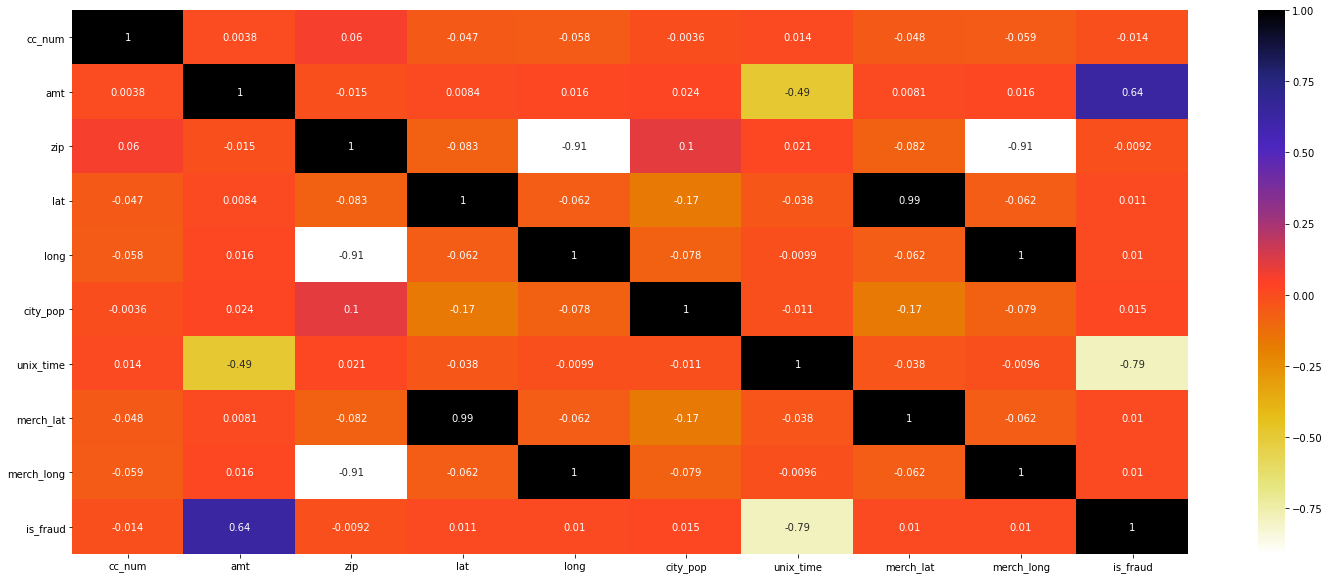

In [8]:
import seaborn as sns
plt.figure(figsize=(25,10))
cor=df.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
#cut the is_fraud column
X = df.drop(columns=['is_fraud'])
y= df['is_fraud']

In [10]:
y

0        0
1        0
2        0
3        0
4        0
        ..
13275    1
13276    1
13277    1
13278    1
13279    1
Name: is_fraud, Length: 13280, dtype: int64

In [11]:
X

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,8/3/2020 6:18,2.290000e+15,fraud_Brown-Greenholt,entertainment,44.73,Jeff,Elliott,M,351 Darlene Green,Columbia,...,29209,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,8ef9ff08f404d7b3d3e409d01c6864f4,1362723493,33.116261,-81.127674
1,8/3/2020 6:18,4.070000e+12,"fraud_Jones, Sawayn and Romaguera",misc_net,5.76,Jamie,Olson,F,3423 Michael Canyon Suite 276,River,...,41254,37.8795,-82.7251,571,Quarry manager,7/3/1931,7a8c62f34d624a99e041233b78679fea,1362723496,37.123037,-83.502413
2,8/3/2020 6:18,3.770000e+14,fraud_Sawayn PLC,shopping_pos,96.66,Kara,Miles,F,2076 Thomas Roads Suite 970,Cassatt,...,29032,34.3424,-80.5000,4424,Lawyer,31/07/1961,14dcda986afe1957c339197b144a323c,1362723515,33.502133,-80.324071
3,8/3/2020 6:20,6.042293e+10,fraud_Kuphal-Bartoletti,misc_net,4.48,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,North Augusta,...,29860,33.6028,-81.9748,46944,Secondary school teacher,2/4/1942,398936847b2beb1d4719e56da6f106cc,1362723632,33.920335,-82.428727
4,8/3/2020 6:20,3.530000e+15,fraud_Huels-Hahn,gas_transport,54.87,Melissa,Rodriguez,F,81708 Christopher Plaza,Jordanville,...,13361,42.8948,-74.8209,824,Travel agency manager,1/9/1985,4d21d720de023bcef6f822fbeceaf22d,1362723647,43.772547,-74.400886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13275,10/3/2020 3:59,3.590000e+15,fraud_Kris-Weimann,misc_net,690.49,Paula,Estrada,F,350 Stacy Glens,Spencer,...,57374,43.7557,-97.5936,343,"Development worker, international aid",5/3/1972,fb1ddd251bbec9b84c9755e856d51723,1362887989,43.254214,-98.267759
13276,10/3/2020 4:31,3.550000e+15,"fraud_Casper, Hand and Zulauf",grocery_pos,324.74,Jordan,May,M,1626 Susan Course,Aledo,...,76008,32.7004,-97.6039,13602,Optometrist,5/7/1984,4dca0549e43b7e265cae7fd8a7e563b4,1362889904,33.607221,-97.996506
13277,10/3/2020 4:59,3.590000e+15,fraud_Kiehn Inc,grocery_pos,331.33,Paula,Estrada,F,350 Stacy Glens,Spencer,...,57374,43.7557,-97.5936,343,"Development worker, international aid",5/3/1972,d18c55035998e461aa9040e254b74925,1362891561,44.228731,-98.330520
13278,10/3/2020 8:22,3.590000e+15,fraud_Rau and Sons,grocery_pos,356.20,Paula,Estrada,F,350 Stacy Glens,Spencer,...,57374,43.7557,-97.5936,343,"Development worker, international aid",5/3/1972,bdaeb5e3413a408d7e6c3720a35337d5,1362903771,43.988931,-97.989985


In [12]:
!pip install category_encoders

In [13]:
X = X.drop(columns=['street','trans_num','first','last','dob','merch_lat','merch_long'])
X

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time
0,8/3/2020 6:18,2.290000e+15,fraud_Brown-Greenholt,entertainment,44.73,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1362723493
1,8/3/2020 6:18,4.070000e+12,"fraud_Jones, Sawayn and Romaguera",misc_net,5.76,F,River,KY,41254,37.8795,-82.7251,571,Quarry manager,1362723496
2,8/3/2020 6:18,3.770000e+14,fraud_Sawayn PLC,shopping_pos,96.66,F,Cassatt,SC,29032,34.3424,-80.5000,4424,Lawyer,1362723515
3,8/3/2020 6:20,6.042293e+10,fraud_Kuphal-Bartoletti,misc_net,4.48,M,North Augusta,SC,29860,33.6028,-81.9748,46944,Secondary school teacher,1362723632
4,8/3/2020 6:20,3.530000e+15,fraud_Huels-Hahn,gas_transport,54.87,F,Jordanville,NY,13361,42.8948,-74.8209,824,Travel agency manager,1362723647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13275,10/3/2020 3:59,3.590000e+15,fraud_Kris-Weimann,misc_net,690.49,F,Spencer,SD,57374,43.7557,-97.5936,343,"Development worker, international aid",1362887989
13276,10/3/2020 4:31,3.550000e+15,"fraud_Casper, Hand and Zulauf",grocery_pos,324.74,M,Aledo,TX,76008,32.7004,-97.6039,13602,Optometrist,1362889904
13277,10/3/2020 4:59,3.590000e+15,fraud_Kiehn Inc,grocery_pos,331.33,F,Spencer,SD,57374,43.7557,-97.5936,343,"Development worker, international aid",1362891561
13278,10/3/2020 8:22,3.590000e+15,fraud_Rau and Sons,grocery_pos,356.20,F,Spencer,SD,57374,43.7557,-97.5936,343,"Development worker, international aid",1362903771


In [14]:
from category_encoders import TargetEncoder
enc = TargetEncoder(cols=['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt' ,'gender',
 'city' ,'state', 'zip' ,'lat', 'long', 'job','unix_time'])
X = enc.fit_transform(X,y)
X


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time
0,0.053911,0.476190,0.222222,0.267728,0.121631,0.484340,0.461538,0.444099,0.461538,0.461538,0.461538,333497,0.546667,0.452259
1,0.053911,0.000412,0.500000,0.666068,0.021449,0.423668,0.000412,0.481229,0.000412,0.000412,0.000412,571,0.000412,0.452259
2,0.053911,0.500000,0.516129,0.499246,0.452259,0.423668,0.615384,0.444099,0.615384,0.615384,0.615384,4424,0.848485,0.452259
3,0.121631,0.500000,0.583333,0.666068,0.008134,0.484340,0.500000,0.444099,0.500000,0.500000,0.500000,46944,0.338710,0.452259
4,0.121631,0.458861,0.318182,0.396497,0.452259,0.423668,0.736842,0.496914,0.736842,0.736842,0.736842,824,0.341463,0.452259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13275,0.487160,0.290323,0.750000,0.666068,0.452259,0.423668,0.437500,0.473214,0.437500,0.437500,0.437500,343,0.600000,0.452259
13276,0.487160,0.513725,0.581395,0.666348,0.852690,0.484340,0.286126,0.430617,0.286126,0.286126,0.286126,13602,0.200031,0.452259
13277,0.204537,0.290323,0.605263,0.666348,0.452259,0.423668,0.437500,0.473214,0.437500,0.437500,0.437500,343,0.600000,0.452259
13278,0.259592,0.290323,0.672414,0.666348,0.452259,0.423668,0.437500,0.473214,0.437500,0.437500,0.437500,343,0.600000,0.452259


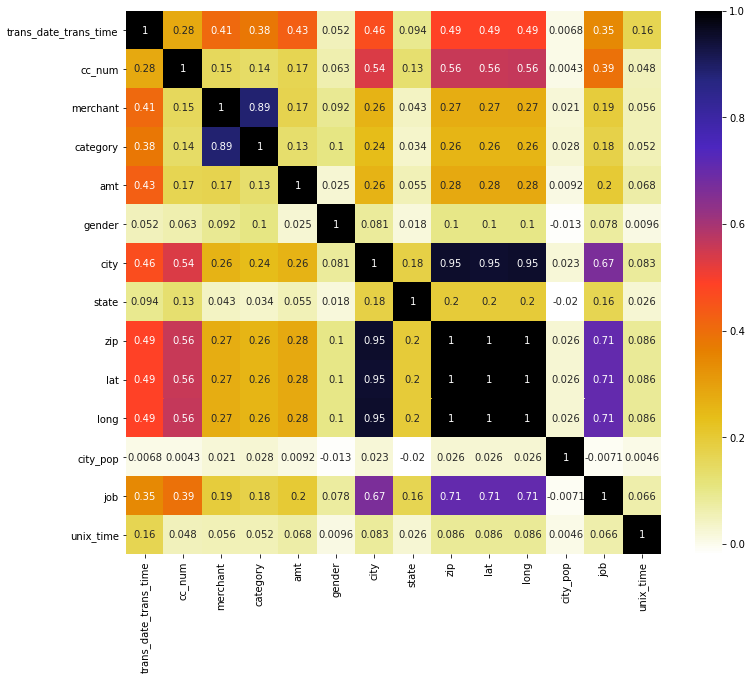

In [15]:
plt.figure(figsize=(12,10))
cor=X.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
#Creating the decision tree
from sklearn.tree import DecisionTreeClassifier
#create an instance of DecisionTreeClassifier with default parameters
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
#classifier trained on the dataset using fit function
dtree = dtree.fit(X, y) 

In [17]:
#mean accuracy
dtree.score(X,y) 

0.9996234939759037

In [18]:
#visualize the decision tree 
from sklearn import tree
import matplotlib.pyplot as plt

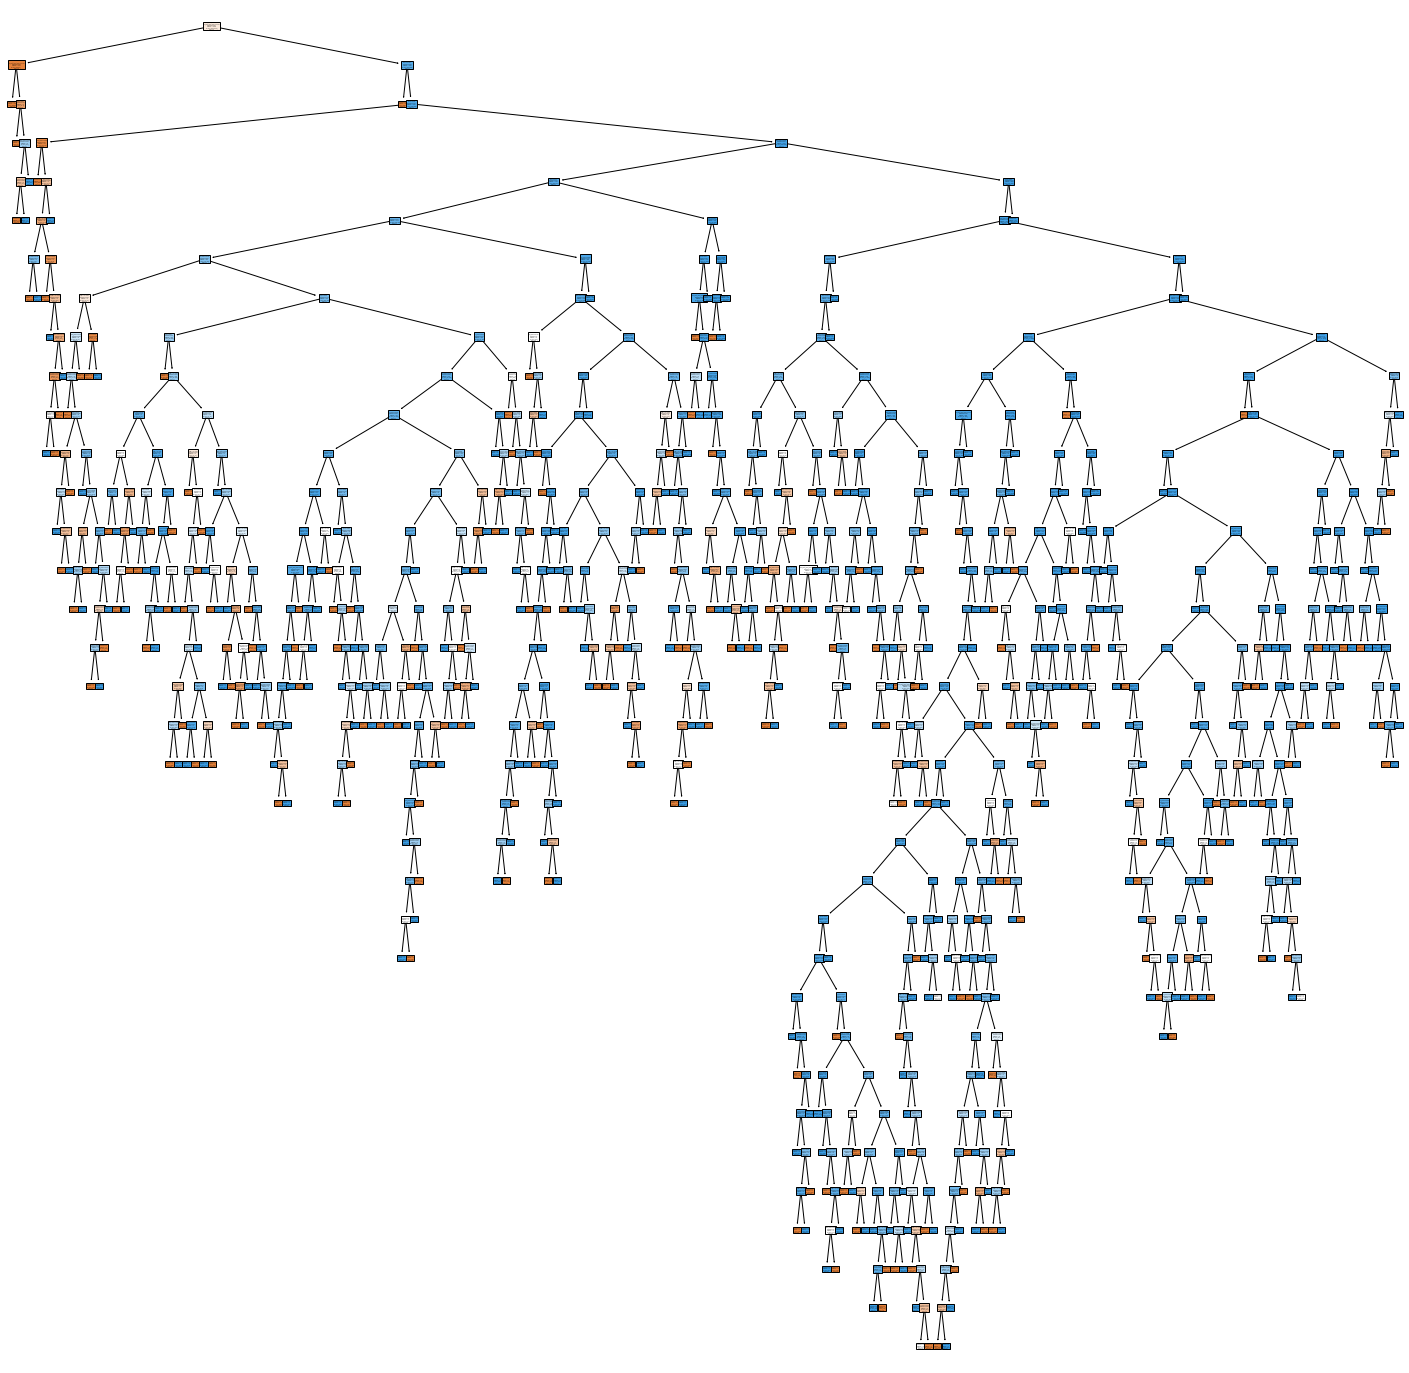

In [19]:
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(dtree, 
                   feature_names=['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'lat', 'long', 'unix_time','hours','job','zip','city_pop'],  
                   class_names=['0','1'],
                   filled=True)

In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
## test_size=0.2 which means 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) 
#random_state simply sets a seed to the random generator, 
#so that train-test splits are always deterministic.

In [21]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)


In [22]:
dtree.score(X_train, y_train)

0.9995293674698795

In [23]:
dtree.score(X_test, y_test)

0.9469126506024096

In [24]:
print('Accuracy of decision tree on training set: {:.2f}'.format(dtree.score(X_train,y_train)))
print('Accuracy of decision tree on test set: {:.2f}'.format(dtree.score(X_test,y_test)))


Accuracy of decision tree on training set: 1.00
Accuracy of decision tree on test set: 0.95


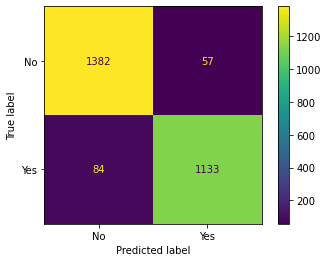

In [25]:
#create confusion matrix to evalute the decision tree performance
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_confusion_matrix(dtree, X_test, y_test, display_labels = ['No', 'Yes']) 
#metrics.plot_confusion_matrix(dtree, X_test, y_test, display_labels = ['No', 'Yes'], normalize='true') 

In [26]:
#Predict the response for test dataset
y_pred = dtree.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(y_test)
print(y_pred)


[[1382   57]
 [  84 1133]]
366      0
2917     0
6612     0
7899     1
308      0
        ..
11586    1
9636     1
4910     0
8971     1
8538     1
Name: is_fraud, Length: 2656, dtype: int64
[0 0 0 ... 0 0 1]


In [27]:
#extract TP,TN,FP, FN
#ravel method returns a numpy array containing tn, fp, fn, tp
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_pred).ravel()

print(tn,tp,fn,tp)


1382 1133 84 1133


In [28]:
#compute precision, recall, F-score
print(metrics.classification_report(y_test, y_pred, target_names=['No', 'Yes']))

#returns result in a dictionary
#metrics.classification_report(y_test, y_pred, target_names=['No', 'Yes']), output_dict=True)

              precision    recall  f1-score   support

          No       0.94      0.96      0.95      1439
         Yes       0.95      0.93      0.94      1217

    accuracy                           0.95      2656
   macro avg       0.95      0.95      0.95      2656
weighted avg       0.95      0.95      0.95      2656



In [29]:
#compute accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9469126506024096

In [30]:
#precision 
metrics.precision_score(y_test, y_pred)

0.9521008403361344

In [31]:
#recall
metrics.recall_score(y_test, y_pred)

0.9309778142974527

In [32]:
#F1-score
metrics.f1_score(y_test, y_pred)

0.9414208558371416

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#create an instance of KFold with specified n_splits = k,
#shuffle = False means do not shuffle the dataset before splitting
kf = KFold(n_splits=10,  shuffle=False)
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state = 0)
#cross_val_score computes the score
#returns an array of scores of the estimator for each run of the cross validation.
scores = cross_val_score(dtree, X, y, scoring='accuracy', cv=kf)
scores

array([0.92996988, 0.93900602, 0.94503012, 0.97439759, 0.92545181,
       0.99171687, 1.        , 0.99849398, 0.99849398, 0.98569277])

In [34]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.03


In [35]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X): #X is the initial dataset of features
    print("TRAIN:", train_index, "TEST:", test_index)

#train_index and test_index contains the indices of the training and test fold in each iteration of the 
#k-fold cross validation

TRAIN: [    0     1     2 ... 13276 13277 13279] TEST: [    8    14    19 ... 13234 13235 13278]
TRAIN: [    1     2     3 ... 13277 13278 13279] TEST: [    0    17    31 ... 13267 13273 13276]
TRAIN: [    0     1     2 ... 13277 13278 13279] TEST: [    3    10    29 ... 13243 13271 13274]
TRAIN: [    0     1     2 ... 13277 13278 13279] TEST: [   12    20    23 ... 13244 13245 13268]
TRAIN: [    0     1     2 ... 13276 13277 13278] TEST: [   26    48    65 ... 13262 13275 13279]
TRAIN: [    0     1     2 ... 13277 13278 13279] TEST: [   27    28    34 ... 13232 13236 13265]
TRAIN: [    0     1     3 ... 13277 13278 13279] TEST: [    2    15    18 ... 13252 13269 13272]
TRAIN: [    0     1     2 ... 13277 13278 13279] TEST: [    6     7    22 ... 13253 13257 13270]
TRAIN: [    0     2     3 ... 13276 13278 13279] TEST: [    1    11    13 ... 13260 13263 13277]
TRAIN: [    0     1     2 ... 13277 13278 13279] TEST: [    4     5     9 ... 13256 13261 13266]


In [36]:
kf = KFold(n_splits=10, shuffle=False)
dtree = DecisionTreeClassifier(criterion='entropy', random_state = 42)
acc_score = []

for train_index, test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
     
    acc = metrics.accuracy_score(y_pred , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/10 #k=10, so 10 scores
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9487951807228916, 0.9533132530120482, 0.9533132530120482, 0.9796686746987951, 0.9382530120481928, 0.9533132530120482, 0.8637048192771084, 0.8719879518072289, 0.9058734939759037, 0.8742469879518072]
Avg accuracy : 0.9242469879518073


In [37]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=kf, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        kf = KFold(n_splits=10, random_state=42, shuffle=True)
        cv_scores = cross_val_score(tree_model, X, y, cv=kf, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [38]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim(0.9,1.1)
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

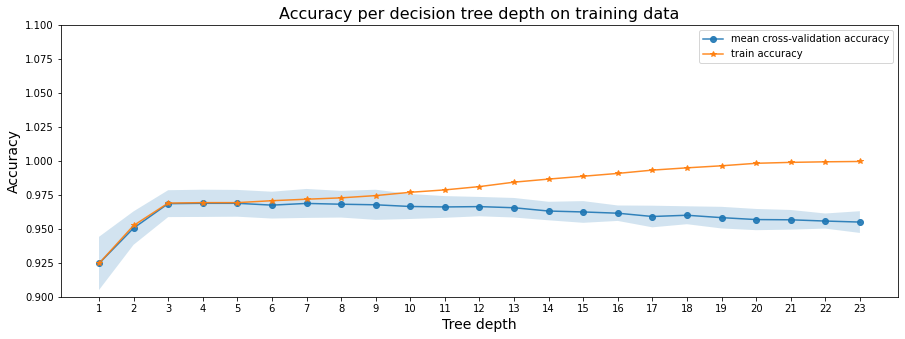

In [39]:
# fitting trees of depth 1 to 23
import numpy as np
sm_tree_depths = range(1,24)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [40]:
print(sm_cv_scores_mean)

[0.92453436 0.95055408 0.96854207 0.96879312 0.96879305 0.96745421
 0.96870951 0.96812366 0.9677056  0.96645044 0.9661155  0.96636606
 0.96552959 0.96310316 0.96243398 0.96151334 0.95908691 0.96000707
 0.95825037 0.95682785 0.95666084 0.95574005 0.95498755]


In [41]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-4 tree achieves the best mean cross-validation accuracy 96.87931 +/- 0.50116% on training dataset


In [42]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 7-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  4
Accuracy, Training Set:  96.92938 %
Accuracy, Test Set:  98.56928 %


In [43]:
# Create Decision Tree classifer with the choosen depth 7
dtree_ = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state = 0)

# Train Decision Tree Classifer
dtree_ = dtree_.fit(X_train,y_train)


In [44]:
dtree_.score(X_train,y_train) 

0.9695448460508701

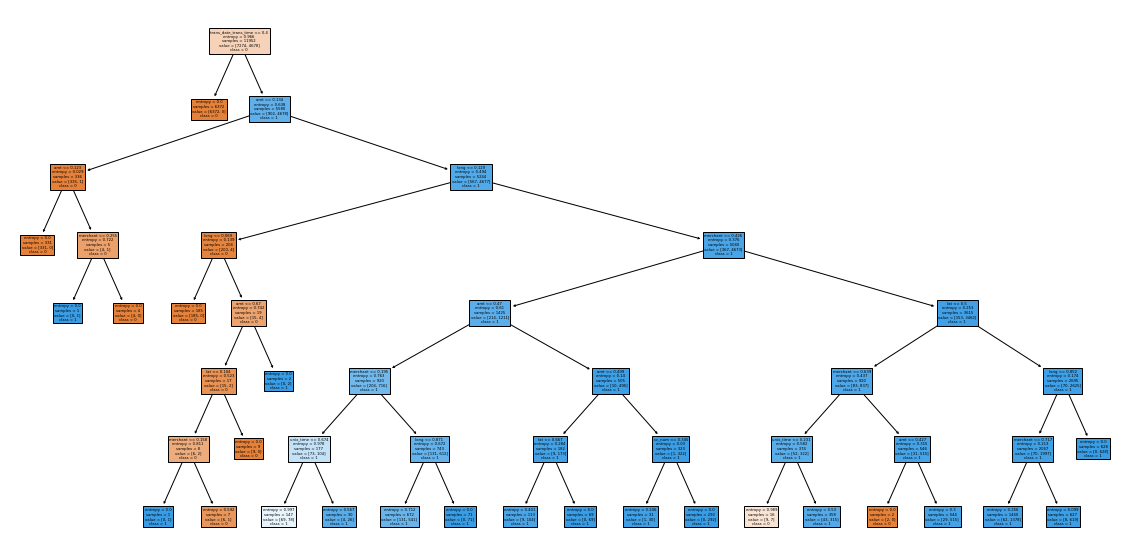

In [45]:
fig_ = plt.figure(figsize=(20,10))
new_tree= tree.plot_tree(dtree_, 
                   feature_names=['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'lat', 'long', 'unix_time','hours','job','zip','city_pop'],  
                   class_names=['0','1'],
                   filled=True)

In [46]:
res=dtree.predict_proba(X_test,check_input=True)
#for i in range(0,res.shape[0]):
#    print(res[i])
propDataFrame=pd.DataFrame(res,columns=['not_fraud','is_fraud'])

propDataFrame = propDataFrame[propDataFrame.is_fraud != 0]
propDataFrame

,not_fraud,is_fraud
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1318,0.0,1.0
1320,0.0,1.0
1321,0.0,1.0
1323,0.0,1.0


In [47]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [48]:
rules= get_rules(dtree,X_train.columns.values,['0','1'])
for r in rules:
    print(r)

if (trans_date_trans_time <= 0.4) then class: 0 (proba: 100.0%) | based on 6,372 samples
if (trans_date_trans_time > 0.4) and (amt > 0.134) and (lat > 0.129) and (merchant > 0.426) and (lat > 0.5) and (zip > 0.852) then class: 1 (proba: 100.0%) | based on 628 samples
if (trans_date_trans_time > 0.4) and (amt <= 0.134) and (amt <= 0.123) then class: 0 (proba: 100.0%) | based on 331 samples
if (trans_date_trans_time > 0.4) and (amt > 0.134) and (lat > 0.129) and (merchant <= 0.426) and (amt > 0.47) and (amt > 0.499) and (cc_num > 0.345) then class: 1 (proba: 100.0%) | based on 292 samples
if (trans_date_trans_time > 0.4) and (amt > 0.134) and (lat > 0.129) and (merchant > 0.426) and (lat > 0.5) and (zip <= 0.852) and (merchant <= 0.717) and (amt <= 0.701) and (job > 0.66) and (amt <= 0.5) and (merchant <= 0.716) and (category > 0.448) then class: 1 (proba: 100.0%) | based on 213 samples
if (trans_date_trans_time > 0.4) and (amt > 0.134) and (lat > 0.129) and (merchant > 0.426) and (lat >